# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [3]:
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
809,25,male,25.840,1,no,northeast,3309.79260
582,39,male,45.430,2,no,southeast,6356.27070
1304,42,male,24.605,2,yes,northeast,21259.37795
330,61,female,36.385,1,yes,northeast,48517.56315
215,41,female,37.100,2,no,southwest,7371.77200
257,38,female,40.150,0,no,southeast,5400.98050
1258,55,male,37.715,3,no,northwest,30063.58055
340,24,female,27.600,0,no,southwest,18955.22017
654,59,female,35.200,0,no,southeast,12244.53100
201,48,female,32.230,1,no,southeast,8871.15170


In [3]:
#Look at the distribution of charges
#Label encode categorical features
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [4]:
#How correlated is each feature with the charges variable (target)?

data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

/tmp/ipykernel_4462/2679124215.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


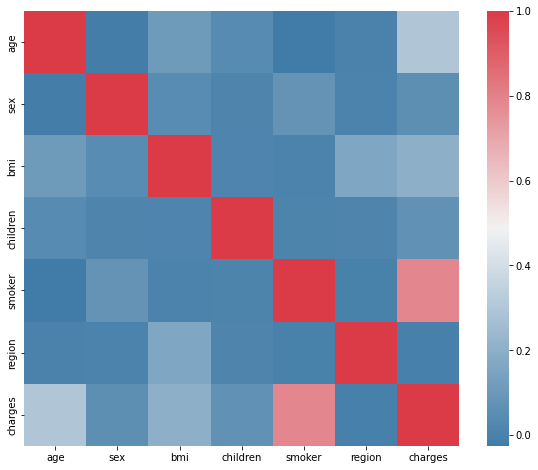

In [5]:
#Make a heatmap

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

plt.show()

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

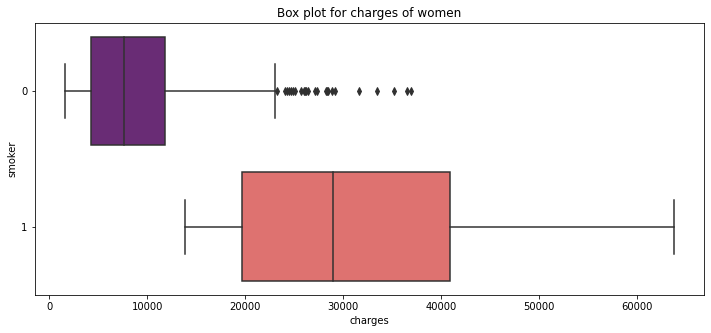

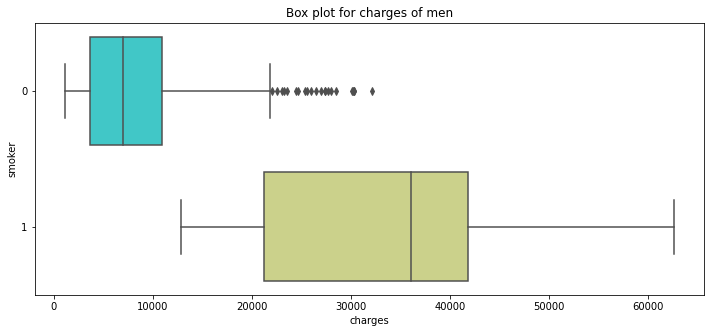

In [6]:
# Look at the distribution for smokers and for non smokers
#Make a one or more graphs that compare sex, charges and smoker

plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'magma')

plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'rainbow')

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

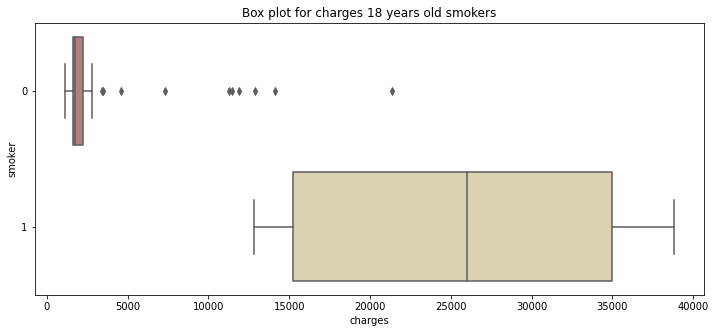

In [7]:
#How does the Age affect the insurance charges?

plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


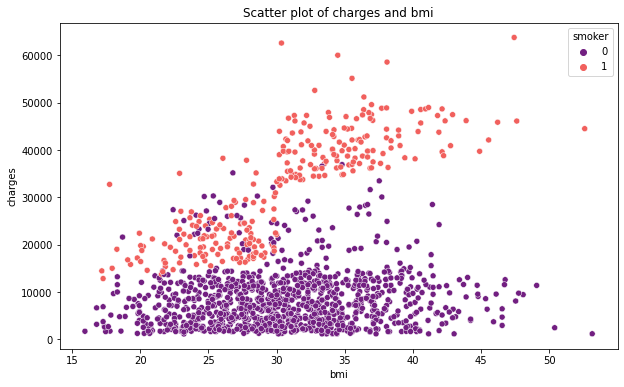

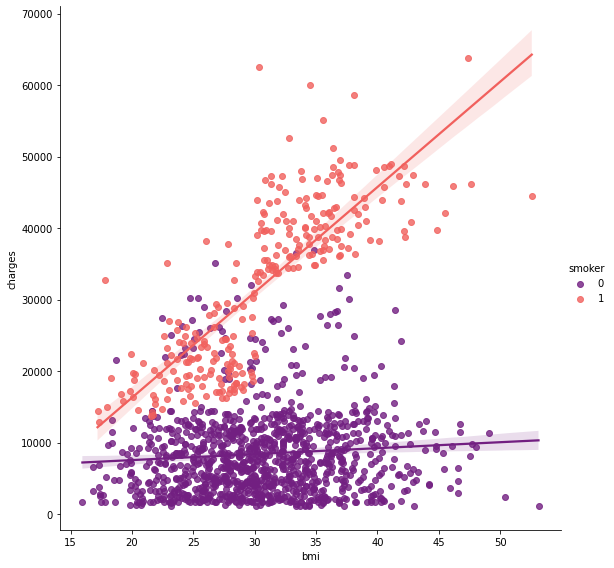

In [8]:
#Lokk at the distribution of bmi
#Make a scatterplot of charges vs bmi vs smoker

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

### Does the number of children affect the charges of the insurance?

### Is there a difference in the insurance prima for different regions? Should we drop any column?

In [9]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [10]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147233


<AxesSubplot:>

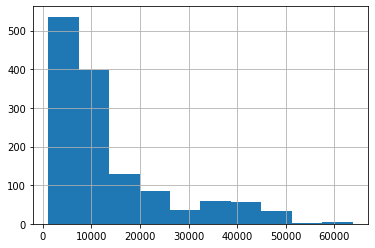

In [16]:
data['charges'].hist()

In [25]:
print (f'El Mean Square Error test es:', metrics.mean_squared_error(y_test, y_test_pred, squared=False))
print (f'El Mean Square Error train es:', metrics.mean_squared_error(y_train, y_train_pred, squared=False))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_test_pred)))

El Mean Square Error test es: 5663.358417062193
El Mean Square Error train es: 6168.476538503498
Root Mean Squared Error: 4256.478068102456
